In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
run -i AnalyzeTrajectory_graphtheory.py

In [3]:
snapshotlist1 = readTrajectory('F:/uhpc_backup/Data_MEDYAN/Arp2&3_paper_data/9_23_2019/branched(0.047)/0.5and0.01/Output/snapshot.traj')

Reading F:/uhpc_backup/Data_MEDYAN/Arp2&3_paper_data/9_23_2019/branched(0.047)/0.5and0.01/Output/snapshot.traj...
111 snapshots read.


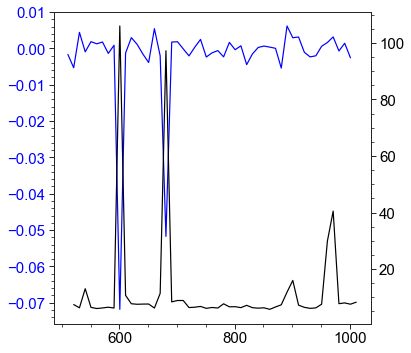

In [24]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

pair1 = meanDisplacement(snapshotlist1)
x1=[]
y1=[]
for p in pair1:
    x1.append(p[0])
    y1.append(p[1])
    absy1=[abs(m) for m in y1]
    mx1=x1[2:]
    mabsy1=absy1[2:]
    
numSec1 = []
Rglist1 = []
for x in range(1,110,1):
    y1 = radiusOfGyration(snapshotlist1,x)
    numSec1.append(y1[0])
    Rglist1.append(y1[1])
    

length2=len(numSec1)
delta1=[None]*length2 
delta1[0]=0
for n in range(1,length2,1): 
    delta1[n]=(Rglist1[n]-Rglist1[n-1])/Rglist1[0]

    
numSec1=numSec1[50:100]    
delta1=delta1[50:100]
mx1=mx1[50:100]
mabsy1=mabsy1[50:100]
    
sns.set_style("ticks")
sns.set_context("paper")
mpl.rc('font',family='Arial')

fig, ax1 = plt.subplots(figsize=(5.8,5))
color = 'blue'
ax1.plot(numSec1, delta1, color=color)
ax1.tick_params(axis='x', labelcolor='black', labelsize=15)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)

ax2 = ax1.twinx()  

color = 'black'
ax2.plot(mx1, mabsy1, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

ax1.minorticks_on()
ax2.minorticks_on()

ax1.xaxis.set_major_locator(MultipleLocator(200))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax1.xaxis.set_minor_locator(MultipleLocator(50))

fig.tight_layout()


plt.savefig('./avalanche_md&Rg.png',dpi=1200)
plt.show()

In [6]:
snapshotlist2 = readTrajectory_graphtheory('F:/uhpc_backup/Data_MEDYAN/Arp2&3_paper_data/9_23_2019/branched(0.047)/0.5and0.01/Output/snapshot.traj')

Reading F:/uhpc_backup/Data_MEDYAN/Arp2&3_paper_data/9_23_2019/branched(0.047)/0.5and0.01/Output/snapshot.traj...
111 snapshots read.


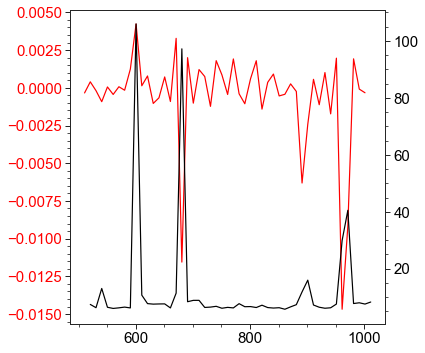

In [7]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# pair1 = meanDisplacement(snapshotlist1)
# x1=[]
# y1=[]
# for p in pair1:
#     x1.append(p[0])
#     y1.append(p[1])
#     absy1=[abs(m) for m in y1]
#     mx1=x1[2:]
#     mabsy1=absy1[2:]
    
numSec1 = []
Shapelist1 = []
for x in range(1,110,1):
    z1 = shape_parameter(snapshotlist2,x)
    numSec1.append(z1[0])
    Shapelist1.append(z1[1])
    
length2=len(numSec1)
delta2=[None]*length2 
delta2[0]=0
for n in range(1,length2,1): 
    delta2[n]=Shapelist1[n]-Shapelist1[n-1]


    
numSec1=numSec1[50:100]    
delta2=delta2[50:100]
    
sns.set_style("ticks")
sns.set_context("paper")
mpl.rc('font',family='Arial')

fig, ax1 = plt.subplots(figsize=(6,5))
color = 'red'
ax1.plot(numSec1, delta2, color=color)
ax1.tick_params(axis='x', labelcolor='black', labelsize=15)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)

ax2 = ax1.twinx()  

color = 'black'
ax2.plot(mx1, mabsy1, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

ax1.minorticks_on()
ax2.minorticks_on()

ax1.xaxis.set_major_locator(MultipleLocator(200))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax1.xaxis.set_minor_locator(MultipleLocator(50))


fig.tight_layout()


plt.savefig('./avalanche_md&S.png',dpi=1200)
plt.show()

In [8]:
#code to compute Z-score for the successive difference of a graph theory parameters, may take a while to run

#assortativity
xs1 = [x[0] for x in assortlist(snapshotlist2)]
ys1 = [x[1] for x in assortlist(snapshotlist2)]
ys1array=np.array(ys1)
ys1diff=np.diff(ys1array)
ys1diff=np.insert(ys1diff, 0, 0)
ys1_Zscore=stats.zscore(ys1diff)

xs1=xs1[50:100]
ys1_Zscore=ys1_Zscore[50:100]

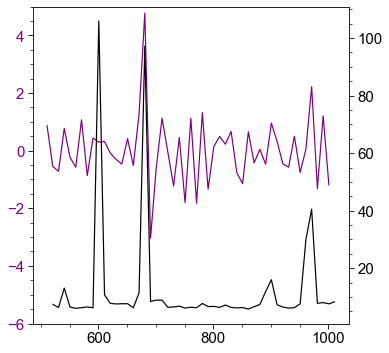

In [25]:
sns.set_style("ticks")
sns.set_context("paper")
mpl.rc('font',family='Arial')

fig, ax1 = plt.subplots(figsize=(5.5,5))
color = 'purple'
ax1.plot(xs1, ys1_Zscore, color=color)
ax1.tick_params(axis='x', labelcolor='black', labelsize=15)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)
ax1.set_ylim((-6,5))

ax2 = ax1.twinx()  

color = 'black'
ax2.plot(mx1, mabsy1, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

ax1.minorticks_on()
ax2.minorticks_on()

ax1.xaxis.set_major_locator(MultipleLocator(200))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax1.xaxis.set_minor_locator(MultipleLocator(50))


fig.tight_layout()


plt.savefig('./avalanche_md&Zdeltarho.png',dpi=1200)
plt.show()